In [4]:
#TO remove :
import os
directory = os.getcwd()
print(directory)

C:\Users\s1114237\OneDrive - Syngenta\Formations\Training\EPFL extension school\Machine_Learning_EPFL-extension-school\Course#2 Data Analysis


In [2]:
#os.chdir("Machine_Learning_EPFL-extension-school\Course#2 Data Analysis")
#directory = os.getcwd()
#print(directory)

<a id="function_def"></a>
### Functions :

In [8]:
# print a complete table : (source: https://stackoverflow.com/questions/19124601/pretty-print-an-entire-pandas-series-dataframe )
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    pd.options.display.max_colwidth = 150# (source : https://stackoverflow.com/questions/29902714/print-very-long-string-completely-in-pandas-dataframe)
    display(x)
    pd.reset_option('display.max_rows') 
    pd.options.display.max_colwidth = 50 

<a id="top"></a>
# Project Course 2 

### Task : 

- A) [An overview of the dataset](#TaskA)
- B) [Data Cleaning](#TaskB)
- C) [Preliminary Exploratory Data Analysis (EDA)](#TaskC)
- D) [EDA: Text data](#TaskD)
- E) [EDA: Time-series data](#TaskE)
- F) [EDA: Correlation analysis](#TaskF)
- G) [Advanced EDA](#TaskG)


<a id="TaskA"></a>
## OpenFood database : Task A
[top](#top)

The dataset was collected from the Open Food repo, a community-driven open database for barcoded food products. This dataset contains the ingredients and nutritional facts of approximately 385k food products, from several countries worldwide.

- **id:** The ID used by the OpenFood database for this Product.
- **barcode:** Product barcode.
- **ingredients_en:** The ingredients of the Product in English as provided by the manufacturer.
- **quantity:** The dry net weight or volume of the Product. To be used in conjunction with the unit.
- **unit**: The unit used by quantity to measure the weight or volume of the Product (usually g or ml).
- **portion_quantity:** The dry net weight or volume of a serving size of the Product. To be used in conjunction with portion_unit.
- **portion_unit:** The unit used by portion_quantity to measure the weight or volume of a serving size of the Product (usually g or ml).
- **hundred_unit:** The unit used for the “per hundred” product nutrients (usually g or ml).
- **alcohol_by_volume:** The percentage of alcohol in the Product.
- **nutrients:** The Product’s nutrients as described by the manufacturer.
- **created_at:** UTC DateTime at which this Product was added to the OpenFood database.
- **updated_at:** UTC DateTime at which this Product (or one of its subordinate objects, including images nutrients) was last modified.


In [4]:
#Task A library : 
import pandas as pd

### Tasks : 

- 1.Import the data as a pandas DataFrame into your notebook.
- 2.Check the number of rows and columns. You should have 385’384 samples and 99 columns.
- 3.Display a few entries from the DataFrame.
- 4.Check the data type for each column. Create separate lists to hold the names of columns of the same data type.
- 5.Check the data by the type of information they hold. Create 3 lists that hold _per_hundred, _per_portion and _unit columns. Put the remaining column names in a 4th list named other_cols. Note that you should create these 4 lists without manually selecting the column names.

### 1. Import the data as a pandas DataFrame
We recommend loading it using the pandas read_pickle function and setting the compression parameter to ‘zip’:

In [6]:
filename = "Ressources/data_385k.pkl"
df = pd.read_pickle(filename, compression='zip') #Un peu long

### 2. Check the number of rows and columns
We recommend loading it using the pandas read_pickle function and setting the compression parameter to ‘zip’:

In [7]:
df.shape

(385384, 99)

### 3. Display a few entries from the DataFrame

In [8]:
df.head()

,alcohol_by_volume,barcode,calcium_per_hundred,calcium_unit,carbohydrates_per_hundred,carbohydrates_per_portion,carbohydrates_unit,cholesterol_per_hundred,cholesterol_unit,copper_cu_per_hundred,...,vitamin_b5_panthothenic_acid_per_hundred,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_per_hundred,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_per_hundred,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_per_hundred,vitamin_d_d2_d3_international_units_unit,zinc_per_hundred,zinc_unit
0,0.0,8001772000030,NaN,NaN,75.00,37.50,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,7610809001066,NaN,NaN,1.50,1.13,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,8002530159021,NaN,NaN,52.68,NaN,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,3033715065788,NaN,NaN,70.40,11.97,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0,7610848492740,NaN,NaN,37.00,7.40,g,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 4. Check the data type for each column
``` df.dtypes``` didn't display the type of each column but with this function we will get the type and create lists of columns  per type :

In [9]:
df.info() #Show the Type for each column 'float64' or 'object'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 385384 entries, 0 to 385383
Data columns (total 99 columns):
 #   Column                                           Non-Null Count   Dtype  
---  ------                                           --------------   -----  
 0   alcohol_by_volume                                385384 non-null  float64
 1   barcode                                          385384 non-null  object 
 2   calcium_per_hundred                              264979 non-null  float64
 3   calcium_unit                                     265086 non-null  object 
 4   carbohydrates_per_hundred                        351551 non-null  float64
 5   carbohydrates_per_portion                        11480 non-null   float64
 6   carbohydrates_unit                               351828 non-null  object 
 7   cholesterol_per_hundred                          270282 non-null  float64
 8   cholesterol_unit                                 270329 non-null  object 
 9   copper_cu_per_h

In [10]:
df_types = df.dtypes.unique()
myVars = locals()
print("New vars which list column names with the same type :") 
for t in df_types :
    print("df_"+str(t))
    myVars["df_"+str(t)] = list(df.columns[df.dtypes == t])
    

New vars which list column names with the same type :
df_float64
df_object
df_int64


For example the list of column with the type float 64 :

In [11]:
print(df_float64)

['alcohol_by_volume', 'calcium_per_hundred', 'carbohydrates_per_hundred', 'carbohydrates_per_portion', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_per_hundred', 'energy_per_portion', 'fat_per_hundred', 'fat_per_portion', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_per_portion', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'portion_quantity', 'potassium_k_per_hundred', 'protein_per_hundred', 'protein_per_portion', 'quantity', 'salt_per_hundred', 'salt_per_portion', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'sodium_per_hundred', 'sodium_per_portion', 'sugars_added_per_hundred', 'sugars_per

### 5. Check the data by the type of information they hold 

In [12]:
New_lists = ['_per_hundred', '_per_portion', '_unit', '_other_cols']

print("New variables which list column names with the same type of informations :") 

for suffix in New_lists : # 1 I create the empty variables
    print("df"+str(suffix))
    myVars["df"+str(suffix)] = list()

for colname in  list(df.columns): #each name of column is placed into the different list 
    
    if New_lists[0] in colname :
        myVars["df"+str(New_lists[0])].append(colname) #.split(str(New_lists[0]))[0] # To keep only the part before the suffix
    elif New_lists[1] in colname :
        myVars["df"+str(New_lists[1])].append(colname)#.split(str(New_lists[1]))[0]
    elif New_lists[2] in colname :
        myVars["df"+str(New_lists[2])].append(colname)#.split(str(New_lists[2]))[0]
    else :
        myVars["df"+str(New_lists[3])].append(colname)
        
 

New variables which list column names with the same type of informations :
df_per_hundred
df_per_portion
df_unit
df_other_cols


In [13]:
print(df_per_hundred)

['calcium_per_hundred', 'carbohydrates_per_hundred', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'energy_kcal_per_hundred', 'energy_per_hundred', 'fat_per_hundred', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_per_hundred', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'protein_per_hundred', 'salt_per_hundred', 'saturated_fat_per_hundred', 'sodium_per_hundred', 'sugars_added_per_hundred', 'sugars_per_hundred', 'vitamin_a_iu_per_hundred', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxin_per_hundred', 'vita

In [14]:
print(df_other_cols) 

['alcohol_by_volume', 'barcode', 'country', 'created_at', 'id', 'ingredients_en', 'portion_quantity', 'product_name_de', 'product_name_en', 'product_name_fr', 'quantity', 'unit', 'updated_at']


<a id="TaskB"></a>
## OpenFood database: Task B
[top](#top)

### Data Cleaning Tasks:

- 1. Are there any duplicate entries ? Can we remove them ? What is the shape of the remaining data?
- 2. This data set contains a lot of missing values. Find out where they are: 
    - a) Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest. Make sure all the column names are visible.
    - b) In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not.
    - c) In task A5 we created 4 lists for the _per_hundred, _per_portion and _unit columns, and the remaining columns. Use these 4 lists to create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames)
- 3.Now that you know the extent of missing values in the data, it is time to address them. Your goal is to keep as much data as possible in your data frame. At each step report how many samples and features remain.
    - a) As a first step, remove rows and columns that are completely empty (if there is any).
    - b) Start with your list of _unit columns, and check some of them and show what information they hold. One simple approach to fill up missing values in categorical columns is to use the most frequent value as a proxy for the missing value. Apply this approach to the _unit columns.
    - c) As a second strategy, let’s fill up the missing values of a column using other columns that hold similar information. Apply this approach to the product_name_en column. Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.
    - d) As a third strategy, let’s fill up missing values based on common knowledge. Take the column named iron_per_hundred which has about 30% missing values. One possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.
    - e) Another strategy for text-based columns is to indicate that some of the fields are missing. For instance, the column ingredients_en has about 10% of missing values. Let’s replace them with the term ingredient_missing.
    - f) Finally, let’s assume that you want to build up your data analysis pipeline based on at least 20,000 rows of non-missing data. This amounts to about 5% of the data set. Your task is to drop the columns that have more than 95% of missing values. What is the shape of the remaining data?


In [15]:
#Task B: library 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

%matplotlib inline

### 1. Duplicated entry :
The first question is : Are there any duplicate entries ? 

In [16]:
df.loc[df.duplicated(), :].shape

(10500, 99)

Yes on the 385384 entries 10500 are repeated.

In [17]:
df = df.drop_duplicates()
df.shape

(374884, 99)

### 2. Missing values :
 - Create a table that shows both the number and the percentage of missing values for all columns sorted from largest to smallest : 
 
 ```print_full``` is a function set at the begining of this notebook([↑](#function_def))

In [18]:
df_summarize_missing_values = pd.DataFrame(
    {
        "missing_values_#": df.isnull().sum(),
        "missing_values_percent": round((df.isnull().sum()/df.shape[0])*100,3),
    }
)
print_full(df_summarize_missing_values.sort_values(by = ["missing_values_percent"], ascending=False)) 

,missing_values_#,missing_values_percent
sodium_per_portion,374131,99.799
fiber_insoluble_per_hundred,371375,99.064
fiber_insoluble_unit,371374,99.064
manganese_mn_unit,371347,99.057
manganese_mn_per_hundred,371350,99.057
copper_cu_per_hundred,371273,99.037
copper_cu_unit,371273,99.037
fiber_soluble_unit,371055,98.979
fiber_soluble_per_hundred,371057,98.979
folic_acid_per_hundred,370428,98.811


- In the subject on “Advanced data analysis” we will introduce the missingno library. But you can already install it and try it out if you want. Use missingno to help you visualize where the missing are in the whole data frame and when missing values overlap between columns or not. ***Not to mysefl : test missingno value !!!!!***

- In task A5 we created 4 lists for the _per_hundred, _per_portion and _unit columns, and the remaining columns. Use these 4 lists to create 4 line plots or bar charts that show the percentages of missing values in each list. (In addition, you can also use missingno on these 4 reduced data frames) ***TO DO : test missingno value !!!!!*** (Je pense que j'avais pas compris. C'est le percent dans chaque list mais c'est plus par colonne, est-ce que c'est égal au % average ? per list)

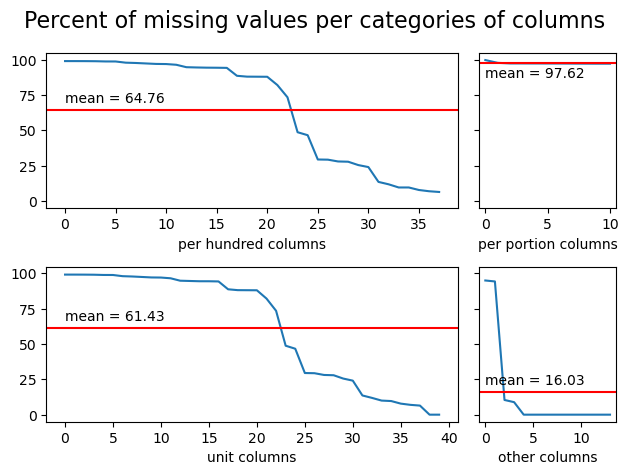

In [19]:
fig, axes = plt.subplots(nrows = 2, # sets the number of rows in the subplot grid
                         ncols = 2, # sets the number of columns in the subplot grid
                         #figsize = (6,4), # sets the width and height of the figure (in inches)
                         sharey=True,
                         gridspec_kw={'width_ratios': [3, 1]}) # let the plots share the same y-axis

fig.suptitle('Percent of missing values per categories of columns', fontsize=16)

nb_miss = df_summarize_missing_values.loc[df_per_hundred,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[0,0].plot(x,df_summarize_missing_values.loc[df_per_hundred,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_per_hundred,["missing_values_percent"]])[0],2)
axes[0,0].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[0,0].text(0, mean_miss+5, 'mean = '+ str(mean_miss))
axes[0,0].set_xlabel('per hundred columns')

nb_miss = df_summarize_missing_values.loc[df_per_portion,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[0,1].plot(x, df_summarize_missing_values.loc[df_per_portion,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_per_portion,["missing_values_percent"]])[0],2)
axes[0,1].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[0,1].text(0, mean_miss-10, 'mean = '+ str(mean_miss))
axes[0,1].set_xlabel('per portion columns')

nb_miss = df_summarize_missing_values.loc[df_unit,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[1,0].plot(x, df_summarize_missing_values.loc[df_unit,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_unit,["missing_values_percent"]])[0],2)
axes[1,0].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[1,0].text(0, mean_miss+5, 'mean = '+ str(mean_miss))
axes[1,0].set_xlabel('unit columns')

nb_miss = df_summarize_missing_values.loc[df_other_cols,["missing_values_percent"]].shape[0]
x = np.linspace(0, nb_miss, nb_miss)
x = np.round(x,0)
axes[1,1].plot(x, df_summarize_missing_values.loc[df_other_cols,["missing_values_percent"]].sort_values(by = ["missing_values_percent"], ascending=False))   # draw the plot on the first axes
mean_miss = np.round(np.mean(df_summarize_missing_values.loc[df_other_cols,["missing_values_percent"]])[0],2)
axes[1,1].axhline(y = mean_miss, color = 'r', linestyle = '-')
axes[1,1].text(0, mean_miss+5, 'mean = '+ str(mean_miss))
axes[1,1].set_xlabel('other columns')

fig.tight_layout()
plt.show()

There is almost none informations into the columns "_per_portion" and more than half of values of the columns "_per_hundred" and "_unit" are missing.

### 3. Transformation of missing values
- Removing rows and columns *completely* empty :

Firstly we identify empty rows (We check columns during the part 2 and no columns have 100% of missing values).

In [20]:
# Identify empty rows :
df.dropna(how="all", axis=0).shape

(374884, 99)

In [21]:
df.shape

(374884, 99)

No completely empty rows.

- With the list of _unit columns : 
    - check some of them and show what information they hold. 
    - Use the most frequent value as a proxy for the missing value. 

Thanks to the table that give us the percent of missing data we can select the 4 columns "_unit" with the lesser missing data to check what is the type of their contant : portion_unit, protein_unit, carbohydrates_unit, fat_unit.

In [22]:
df[["portion_unit", "protein_unit", "carbohydrates_unit", "fat_unit"]].drop_duplicates()

,portion_unit,protein_unit,carbohydrates_unit,fat_unit
0,g,g,g,g
11,g,g,g,NaN
22,ml,g,g,g
23,ml,g,g,NaN
29,ml,NaN,NaN,NaN
41,ml,NaN,g,NaN
57,g,NaN,NaN,NaN
143,l,NaN,NaN,NaN
170,g,NaN,g,NaN
467,g,g,NaN,g


Except for portion_unit (were there is no missing value), all the value in the column "protein_unit", "carbohydrates_unit", "fat_unit" are identical : "g" even if the portion unit is in "ml" or "l" or "Floz".  For each _unit column we will identyfy the most commun value (WO) empty rows and replace the missing value per this information.

For this we create a function to apply on each df_unit column :

In [23]:
# Program to find most frequent element in a list : (source: https://www.geeksforgeeks.org/python-find-most-frequent-element-in-a-list/): 
def most_frequent(List):
    if not isinstance(List, list):
        List = List.tolist()
    List = [element for element in List if str(element) != "nan"] # source: https://java2blog.com/remove-nan-from-list-python/
    unique, counts = np.unique(List, return_counts=True) # need numpy
    index = np.argmax(counts)
    return unique[index]

df[df_unit].apply(most_frequent, axis=0)

calcium_unit                                  mg
carbohydrates_unit                             g
cholesterol_unit                              mg
copper_cu_unit                                mg
energy_kcal_unit                            kCal
energy_unit                                   kJ
fat_unit                                       g
fatty_acids_total_saturated_unit               g
fatty_acids_total_trans_unit                   g
fiber_insoluble_unit                           g
fiber_soluble_unit                             g
fiber_unit                                     g
folate_total_unit                             µg
folic_acid_unit                               µg
hundred_unit                                   g
iron_unit                                     mg
magnesium_unit                                mg
manganese_mn_unit                             mg
monounsaturated_fatty_acids_unit               g
phosphorus_unit                               mg
polyunsaturated_fatt

In [24]:
for col_unit in df_unit:
    df[col_unit].fillna(value=most_frequent(df[col_unit]), inplace=True)
df[df_unit].head()

,calcium_unit,carbohydrates_unit,cholesterol_unit,copper_cu_unit,energy_kcal_unit,energy_unit,fat_unit,fatty_acids_total_saturated_unit,fatty_acids_total_trans_unit,fiber_insoluble_unit,...,vitamin_a_iu_unit,vitamin_b12_cobalamin_unit,vitamin_b1_thiamin_unit,vitamin_b2_riboflavin_unit,vitamin_b3_niacin_unit,vitamin_b5_panthothenic_acid_unit,vitamin_b6_pyridoxin_unit,vitamin_c_ascorbic_acid_unit,vitamin_d_d2_d3_international_units_unit,zinc_unit
0,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
1,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
2,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
3,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg
4,mg,g,mg,mg,kCal,kJ,g,g,g,g,...,IU,µg,mg,mg,mg,mg,mg,mg,IU,mg


- For product_name_en column : Find columns that hold similar information and use them to replace the missing value in product_name_en. Report the number of rows that you managed to fill up.

Firstly we show df_other_cols, to identify from which other column we could take a product_name :

In [25]:
#id, product_name_fr,
df[df_other_cols].head()

,alcohol_by_volume,barcode,country,created_at,id,ingredients_en,portion_quantity,product_name_de,product_name_en,product_name_fr,quantity,unit,updated_at
0,0.0,8001772000030,CH,2016-06-01T11:42:22.908Z,1000,Superior quality durum wheat Pasta\r\n\r\nIngr...,50.0,Bio Spaghetti,Bio Spaghetti,Spaghetti Bio,500.0,g,2019-10-30T13:46:32.651Z
1,0.0,7610809001066,CH,2016-06-01T11:42:25.111Z,1001,"Bio Milk (Switzerland), kitchen salt",75.0,Naturaplan Mozzarella,Naturaplan Mozzarella,Naturaplan Mozzarella,150.0,g,2019-10-30T13:47:12.174Z
2,0.0,8002530159021,CH,2016-06-01T11:42:25.900Z,1002,100% coffee Arabica,0.0,Caffè Mauro - Bio Kaffe,Caffè Mauro - Roasted organic coffee blend,Caffè Mauro - café bio,1000.0,g,2019-10-30T13:48:12.635Z
3,0.0,3033715065788,CH,2016-06-01T11:42:26.184Z,1003,"Powdered chocolate 99% (sugar, cocoa), emulsif...",17.0,Le chocolat Cailler - schokoladenpulver,Le chocolat Cailler - chocolate powder,Le chocolat Cailler - chocolat en poudre,500.0,g,2019-10-30T13:49:49.816Z
4,0.0,7610848492740,CH,2016-06-01T11:42:26.350Z,1004,"cocoa paste * (Honduras), raw cane sugar * (Pa...",20.0,Naturaplan ExtraDunkle Schokolade 70%,Naturaplan Extra Dark Chocolate 70%,Naturaplan Chocolat extra noir 70%,100.0,g,2019-10-30T13:50:42.826Z


Two others columns contain a name for the entry : product_name_de and product_name_fr. when we check the percent of missing data there is more into de ans fr name than in en name. But may be some missing name can be recover from this column: 

In [26]:
df[df["product_name_en"].isnull()][df_other_cols]

,alcohol_by_volume,barcode,country,created_at,id,ingredients_en,portion_quantity,product_name_de,product_name_en,product_name_fr,quantity,unit,updated_at
5,0.0,7610100033247,CH,2016-06-01T11:42:29.472Z,1005,cocoa powder,17.0,Cailler - Kakaopulver,NaN,Cailler - Poudre de cacao,200.0,g,2021-02-06T14:47:12.969Z
16,0.0,7610803008085,CH,2016-06-02T14:03:05.559Z,1020,NaN,0.0,Naturaplan : Mehrkornmehl,NaN,Naturaplan : Farine multi-céréales,1000.0,g,2016-08-18T08:06:42.640Z
18,0.0,7610849101818,CH,2016-06-02T14:03:15.447Z,1022,NaN,10.0,naturaplan : Himbeeren,NaN,"naturaplan : Framboises, confiture",250.0,g,2016-08-18T08:06:50.048Z
26,0.0,7640158540305,CH,2016-06-02T14:03:35.603Z,1030,NaN,250.0,NaN,NaN,OPALINE : ABRCOTS,250.0,ml,2016-07-21T14:54:39.133Z
27,0.0,7640158540251,CH,2016-06-02T14:03:39.974Z,1031,NaN,250.0,NaN,NaN,OPALINE : POMMES ET FRAMBOISES,250.0,ml,2016-09-15T13:39:25.751Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374878,0.0,7640158181492,CH,2021-10-04T14:02:42.220Z,376937,NaN,0.0,falafel (Süsskartoffeln),NaN,falafel (patate douce),180.0,g,2021-10-04T14:08:12.170Z
374880,0.0,7640147023628,CH,2021-10-04T14:12:06.476Z,376940,NaN,20.0,Bourquin nutrition - Sportgetränk (Zitronenges...,NaN,Bourquin nutrition - Boisson d'effort (Goût ci...,480.0,g,2021-10-04T14:21:57.692Z
374881,0.0,3046920021593,CH,2021-10-04T14:22:10.685Z,376941,"cocoa mass, fat reduced cocoa, cocoa butter, d...",0.0,NaN,NaN,Lindt - Noir puissant 85% cacao,100.0,g,2021-10-04T14:27:23.319Z
374882,0.0,4044889004335,CH,2021-10-04T14:27:36.157Z,376942,NaN,0.0,NaN,NaN,NaN,0.0,?,2021-10-04T14:27:43.384Z


We see that we can found name information into  product_name_de and product_name_fr. This 2 columns can't fullfill product_name_en and we have to choose when name exist in fr and in de. We will based our choice on the country :

In [27]:
df[df["product_name_en"].isnull()]["country"].value_counts(normalize=True) #There we check the proportion of each country into the "product_name_en" missing data

CH    0.616885
DE    0.302096
IT    0.078034
FR    0.002834
US    0.000090
AT    0.000030
UK    0.000030
Name: country, dtype: float64

If the missing product_name_en : exist in fr and in de. We check the country. For FR we pick the fr name, for AT and DE we pick the de name and for CH we pick the de name because german is the most talked languague in Switzerland. (cell 30 : An error for a specific row with no value for product_name_en but value for product_name_fr and product_name_de, so I pick randomly fr)

In [28]:
df_row = df.loc[374882] #374880 : example with 2 values,  374882 : example with 0 values, 374881 : example with 1 value;
dico_country = {'CH': "product_name_de", 'DE': "product_name_de", 'AT': "product_name_de", 'FR': "product_name_fr", 'UK' : "product_name_fr"}

def product_name_replacement(df_row):
    if df_row[["product_name_fr","product_name_de"]].dropna().shape[0] == 2:
        val_replacement =  df_row[dico_country[df_row["country"]]]
    elif df_row[["product_name_fr","product_name_de"]].dropna().shape[0] == 1:
        col_name = str(df_row[["product_name_fr","product_name_de"]].dropna()).split(" ", 1)[0]
        val_replacement = df_row[col_name]
    else :
        val_replacement = np.nan
    return val_replacement

product_name_replacement(df_row)


nan

We apply our new function :

In [29]:
row_to_fill = df[df["product_name_en"].isnull()].apply(lambda row : product_name_replacement(row), axis = 1) # Error with UK and 2 vals # df[df["country"] == 'UK'][["product_name_fr","product_name_de","product_name_en"]] # No value for product_name_en for this product 
row_to_fill

5                                     Cailler - Kakaopulver
16                                Naturaplan : Mehrkornmehl
18                                   naturaplan : Himbeeren
26                                        OPALINE : ABRCOTS
27                           OPALINE : POMMES ET FRAMBOISES
                                ...                        
374878                             falafel (Süsskartoffeln)
374880    Bourquin nutrition - Sportgetränk (Zitronenges...
374881                      Lindt - Noir puissant 85% cacao
374882                                                  NaN
374883                                                  NaN
Length: 33165, dtype: object

In [30]:
row_to_fill.dropna().shape

(14299,)

In [31]:
df[df["product_name_en"].isnull()].shape

(33165, 99)

We this function we can fillup 14299 rows on the 33165 with missing values.

In [32]:
df.loc[df["product_name_en"].isnull(),"product_name_en"] = df.loc[df["product_name_en"].isnull()].apply(lambda row : product_name_replacement(row), axis = 1) 
df[df["product_name_en"].isnull()].shape

(18866, 99)

It's work there is now only 18866 missing values in the column "product_name_en".

- For the column named iron_per_hundred : A possible explanation for its missing values could be that those products are iron-free (like ice cream). Based on this assumption address the missing values for iron_per_hundred.

We replace missing value by 0.


In [33]:
df_summarize_missing_values.loc["iron_per_hundred"]

missing_values_#          110495.000
missing_values_percent        29.474
Name: iron_per_hundred, dtype: float64

In [34]:
df["iron_per_hundred"].fillna(value=0, inplace=True)

In [35]:
df["iron_per_hundred"].max()

769230.77

- For the column ingredients_en : Let’s replace them with the "term ingredient_missing".

In [36]:
df["ingredients_en"].fillna(value="ingredient_missing", inplace=True)

- We drop the columns that have more than 95% of missing values :

In [37]:
nb_row_ml=df.shape[0]*0.95
nb_row_ml

356139.8

In [38]:
df_summarize_missing_values[df_summarize_missing_values["missing_values_#"]>=nb_row_ml] #column to drop

,missing_values_#,missing_values_percent
carbohydrates_per_portion,364529,97.238
copper_cu_per_hundred,371273,99.037
copper_cu_unit,371273,99.037
energy_kcal_per_portion,364917,97.341
energy_per_portion,365089,97.387
fat_per_portion,364478,97.224
fiber_insoluble_per_hundred,371375,99.064
fiber_insoluble_unit,371374,99.064
fiber_per_portion,366707,97.819
fiber_soluble_per_hundred,371057,98.979


In [39]:
col_index = df_summarize_missing_values[df_summarize_missing_values["missing_values_#"]<=nb_row_ml].index
col_index

Index(['alcohol_by_volume', 'barcode', 'calcium_per_hundred', 'calcium_unit',
       'carbohydrates_per_hundred', 'carbohydrates_unit',
       'cholesterol_per_hundred', 'cholesterol_unit', 'country', 'created_at',
       'energy_kcal_per_hundred', 'energy_kcal_unit', 'energy_per_hundred',
       'energy_unit', 'fat_per_hundred', 'fat_unit',
       'fatty_acids_total_saturated_per_hundred',
       'fatty_acids_total_saturated_unit',
       'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit',
       'fiber_per_hundred', 'fiber_unit', 'hundred_unit', 'id',
       'ingredients_en', 'iron_per_hundred', 'iron_unit',
       'monounsaturated_fatty_acids_per_hundred',
       'monounsaturated_fatty_acids_unit',
       'polyunsaturated_fatty_acids_per_hundred',
       'polyunsaturated_fatty_acids_unit', 'portion_quantity', 'portion_unit',
       'potassium_k_per_hundred', 'potassium_k_unit', 'product_name_de',
       'product_name_en', 'product_name_fr', 'protein_per_hundred',


In [40]:
df[col_index].shape 

(374884, 65)

We keep 65 columns on 99.

<a id="TaskC"></a>
## OpenFood database : Task C
[top](#top)

###  Preliminary Exploratory Data Analysis (EDA) Tasks :

1. Into categorical variables : 
    * a. What is the number of unique values in categorical variables? 
    * b. Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

2. Into numerical variables : Provide descriptive statistics (e.g., min/max/mean) with informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

3. Errors and unrealistic values are a problem : Identify and address problematic values of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.). Afterwards re-run the descriptive statistics and plots to check everything is ok now.
    Below are some additional tips and hints.
    - Work with the lists of columns ending in per_hundred and _unit. Each nutrient should have an associated per_hundred-column and a _unit-column.
    - The range of acceptable values in each per_hundred-column depends on the unit given in the associated _unit-column. For example, the unit for the protein_per_hundred column is found in the protein_unit column, etc.
    - As the unit of the protein_per_hundred column is g the values in the protein_per_hundred column should range between 0  and 100.
    - If a column’s unit is mg, then the values should range between 0 and 10^5.
    - If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this [Wikipedia page on IU](https://en.wikipedia.org/wiki/International_unit) and this [Wikipedia page on Food energy](https://en.wikipedia.org/wiki/Food_energy) to define an upper threshold value.

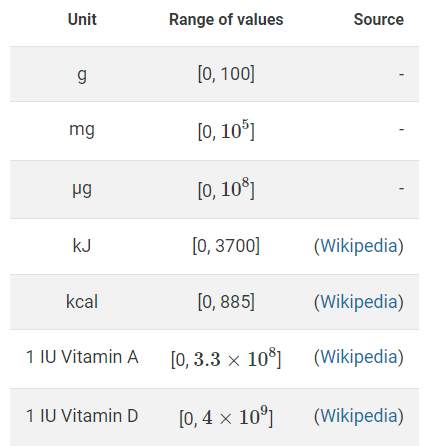 


4. Columns in our data set may be related to each other or pose constraints on one another. Unfortunately, this may also give rise to inconsistencies. Allowing for some rounding errors, your task is to investigate the three cases below and address any problems.
    * a. The column energy_per_hundred measures the energy content in kJ. Analyse its relationship with the column energy_kcal_per_hundred, for example using a scatterplot, identify potential problems and address them.
    * b. The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt, and fiber), because these macronutrients have a specific energy content in kJ per hundred gram (e.g. fat 37 kJ/g, protein and carbohydrates 17 kJ/g). Check these columns for potential inconsistency.
    * c. The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, the overall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.

5. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.

### 1. Categorical variables :
    * Number of unique values in each categorical variables: 

In [41]:
df_categorical_variables = pd.DataFrame(
    {
        "Categorie": df[df_object].apply(lambda x: x.unique() ,axis=0),
        "Count": df[df_object].apply(lambda x: len(x.unique()) ,axis=0)
    }
)
print_full(df_categorical_variables.sort_values(by = ["Count"], ascending=False)) 

,Categorie,Count
barcode,"[8001772000030, 7610809001066, 8002530159021, ...",374446
ingredients_en,[Superior quality durum wheat Pasta\r\n\r\nIng...,247228
product_name_en,"[Bio Spaghetti , Naturaplan Mozzarella, Caffè ...",236651
updated_at,"[2019-10-30T13:46:32.651Z, 2019-10-30T13:47:12...",47015
created_at,"[2016-06-01T11:42:22.908Z, 2016-06-01T11:42:25...",46990
product_name_fr,"[Spaghetti Bio, Naturaplan Mozzarella, Caffè M...",20984
product_name_de,"[Bio Spaghetti , Naturaplan Mozzarella, Caffè...",18573
unit,"[g, ml, cl, l, dl, kg, Floz, Lb, Oz, ?]",10
portion_unit,"[g, ml, l, kg, Floz, dl, ?]",7
country,"[CH, FR, IT, DE, AT, UK, US]",7


  * Show the proportion of samples in each categorical level in the variables country and unit using appropriate visualizations.

In [42]:
# df[["country", "barcode"]].groupby("country").count()
# df[["unit", "barcode"]].groupby("unit").count()

Plots of proportion for the variables country and unit : 

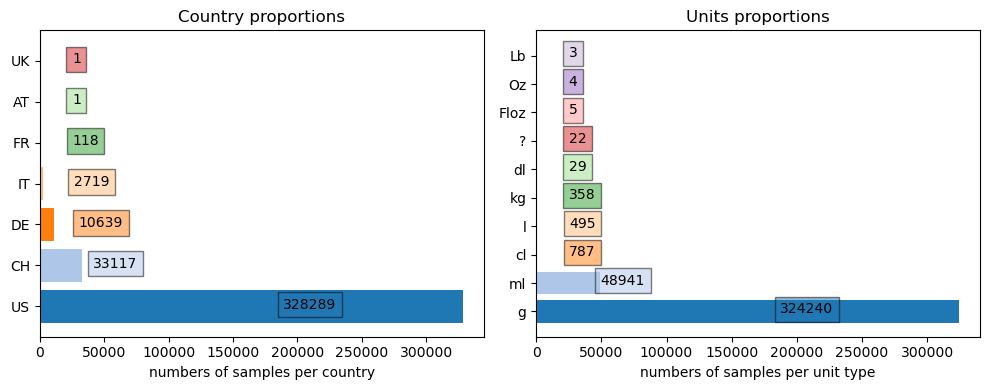

In [43]:
def addlabels(plt, x, colormap): #function coming from : https://www.geeksforgeeks.org/adding-value-labels-on-a-matplotlib-bar-chart/; with modifications
    for i in range(len(x)):
        plt.text(x[i]//2 + 25000,i-0.06, x[i], ha = 'left', bbox = dict(facecolor = colormap[i], alpha =.5))#, color = "white")


fig, axes = plt.subplots(nrows = 1, ncols = 2 , figsize = (10,4)) # sets the width and height of the figure (in inches)
                
#First plot : proportion per country
df_to_plot = df[["country", "unit"]].groupby("country").count()

values = df_to_plot.sort_values(by = ['unit'], ascending=False)['unit']
colormap = plt.cm.tab20(range(0, len(values)))
axes[0].barh(values.index,values,color=colormap)
addlabels(axes[0], values, colormap)
axes[0].set_title("Country proportions")
axes[0].set_xlabel("numbers of samples per country")

#Second plot : proportion per unit
df_to_plot = df[["country", "unit"]].groupby("unit").count()

values = df_to_plot.sort_values(by = ['country'], ascending=False)['country']
colormap = plt.cm.tab20(range(0, len(values)))
axes[1].barh(values.index,values,color=colormap)
addlabels(axes[1], values, colormap)
axes[1].set_title("Units proportions")
axes[1].set_xlabel("numbers of samples per unit type")


fig.tight_layout()
plt.show()

One major categorie  is present for this two variables.

### 2. Numerical variables : 

Provide descriptive statistics (e.g., min/max/mean) with informative plots (e.g., histograms) of the numerical variables. You should obtain these plots as subplots.

First we have two list of numerical columns df_flot64 and df_int :

In [44]:
df_numerical_variable = pd.DataFrame(
    {
        "min": round(df[df_float64 + df_int64].min(),3),
        "mean": round(df[df_float64 + df_int64].mean(),3),
        "max": round(df[df_float64 + df_int64].max(),3),
    }
)
print_full(df_numerical_variable)

,min,mean,max
alcohol_by_volume,0.0,0.028,57.90
calcium_per_hundred,0.0,116.647,684000.00
carbohydrates_per_hundred,0.0,34.005,6400.00
carbohydrates_per_portion,0.0,19.283,150.50
cholesterol_per_hundred,0.0,58.981,250000.00
copper_cu_per_hundred,0.0,5.468,16483.52
energy_kcal_per_hundred,0.0,272.484,39600.00
energy_kcal_per_portion,0.0,159.081,1508.00
energy_per_hundred,0.0,1139.513,165686.40
energy_per_portion,0.0,658.346,5212.00


Subplot of distribution for each variable :

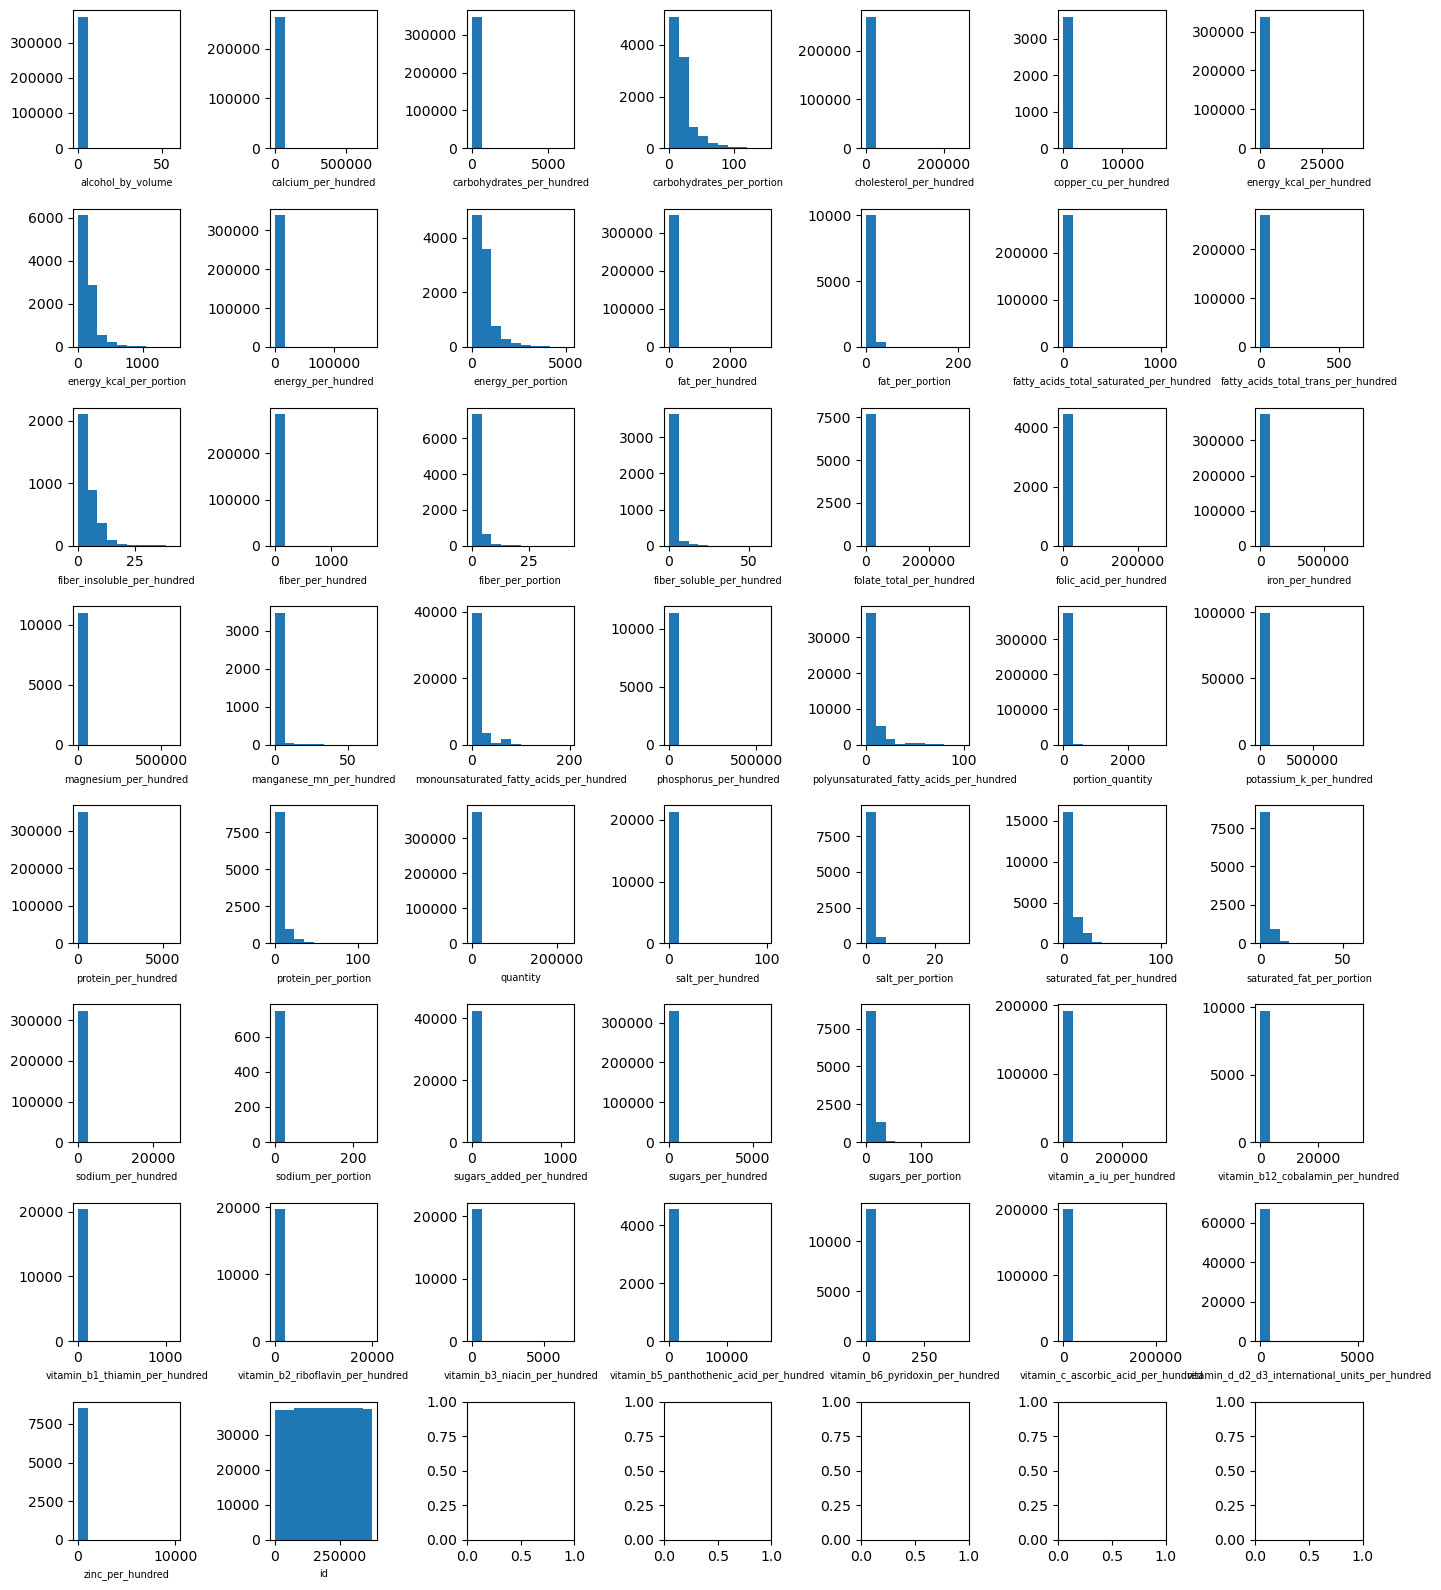

In [45]:
list_numerical_col = df_float64 + df_int64

nb_cols = int(np.sqrt(len(df_float64 + df_int64)))
nb_rows = int(np.sqrt(len(df_float64 + df_int64))) + 1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (14,16)) # sets the width and height of the figure (in inches)
x = 0
y = 0
for i in range(len(df_float64 + df_int64)):
    values = df[list_numerical_col[i]]
    axes[x,y].hist(values)
    axes[x,y].set_xlabel(list_numerical_col[i], fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

The distribution of values aren't centered. We have a high peak at the begining of the distribution and visibly a really small amount of samples with high values.

### Errors and unrealistic values : 

Identify and address problematic values of the per_hundred columns (e.g. protein_per_hundred, fat_per_hundred, etc.). Afterwards re-run the descriptive statistics and plots to check everything is ok now.
    
- Below are some additional tips and hints.
    - Work with the lists of columns ending in per_hundred and _unit. Each nutrient should have an associated per_hundred-column and a _unit-column.
    - The range of acceptable values in each per_hundred-column depends on the unit given in the associated _unit-column. For example, the unit for the protein_per_hundred column is found in the protein_unit column, etc.
    - As the unit of the protein_per_hundred column is g the values in the protein_per_hundred column should range between 0  and 100.
    - If a column’s unit is mg, then the values should range between 0 and 10^5.
    - If a column’s unit is in International units (IU), you can use the “Mass equivalents of 1 IU” indicated on this [Wikipedia page on IU](https://en.wikipedia.org/wiki/International_unit) and this [Wikipedia page on Food energy](https://en.wikipedia.org/wiki/Food_energy) to define an upper threshold value.

We focus on column 'per_hundred' : 
- 1. We list the properties concerned
- 2. We check the first assumption : each column 'per_hundred' have a column '_unit'
- 3. We establish a dataframe with the min and max rules 
- 4. We check that the value are comprise into our dataframe rules functon of the unit if not we replace it with a NaN

In [46]:
#1. List of sample potential properties :
list_sp_property = list()

for colname in df_per_hundred :
    x = colname.split('_per')
    list_sp_property.append(x[0])

list_sp_property
 

['calcium',
 'carbohydrates',
 'cholesterol',
 'copper_cu',
 'energy_kcal',
 'energy',
 'fat',
 'fatty_acids_total_saturated',
 'fatty_acids_total_trans',
 'fiber_insoluble',
 'fiber',
 'fiber_soluble',
 'folate_total',
 'folic_acid',
 'iron',
 'magnesium',
 'manganese_mn',
 'monounsaturated_fatty_acids',
 'phosphorus',
 'polyunsaturated_fatty_acids',
 'potassium_k',
 'protein',
 'salt',
 'saturated_fat',
 'sodium',
 'sugars_added',
 'sugars',
 'vitamin_a_iu',
 'vitamin_b12_cobalamin',
 'vitamin_b1_thiamin',
 'vitamin_b2_riboflavin',
 'vitamin_b3_niacin',
 'vitamin_b5_panthothenic_acid',
 'vitamin_b6_pyridoxin',
 'vitamin_c_ascorbic_acid',
 'vitamin_d_d2_d3_international_units',
 'zinc']

In [47]:
#2. which columns are associated to this property :
for i in range(len(list_sp_property)) :
    list_sp_property[i]
    print(list_sp_property[i])
    l =len(list(filter(lambda colname: list_sp_property[i] in colname, list(df.columns))))
    print(l)
    col =list(filter(lambda colname: list_sp_property[i] in colname, list(df.columns)))
    print(col)
   
# Every element have a unit column

calcium
2
['calcium_per_hundred', 'calcium_unit']
carbohydrates
3
['carbohydrates_per_hundred', 'carbohydrates_per_portion', 'carbohydrates_unit']
cholesterol
2
['cholesterol_per_hundred', 'cholesterol_unit']
copper_cu
2
['copper_cu_per_hundred', 'copper_cu_unit']
energy_kcal
3
['energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_kcal_unit']
energy
6
['energy_kcal_per_hundred', 'energy_kcal_per_portion', 'energy_kcal_unit', 'energy_per_hundred', 'energy_per_portion', 'energy_unit']
fat
14
['fat_per_hundred', 'fat_per_portion', 'fat_unit', 'fatty_acids_total_saturated_per_hundred', 'fatty_acids_total_saturated_unit', 'fatty_acids_total_trans_per_hundred', 'fatty_acids_total_trans_unit', 'monounsaturated_fatty_acids_per_hundred', 'monounsaturated_fatty_acids_unit', 'polyunsaturated_fatty_acids_per_hundred', 'polyunsaturated_fatty_acids_unit', 'saturated_fat_per_hundred', 'saturated_fat_per_portion', 'saturated_fat_unit']
fatty_acids_total_saturated
2
['fatty_acids_total_saturat

In [48]:
#3. We list the unit  and create a table of rules based on wikipedia info:
# When we check the unit variables, from the catagorical varaible analysis, we saw that they are consistent : Each column have only one unit type into this list of unit : UI, g, mg, μg, kCal, kJ.

list_unit =['IU', 'g','mg', 'µg', 'kCal', 'kJ']
list_min = [0,0,0,0,0,0]
list_max = [0.4*(10**9),100,10**5,10**8,885,3700]

df_unit_rules = pd.DataFrame(
    {
        "unit": list_unit,
        "min": list_min,
        "max": list_max,
    }
)
df_unit_rules

,unit,min,max
0,IU,0,400000000.0
1,g,0,100.0
2,mg,0,100000.0
3,µg,0,100000000.0
4,kCal,0,885.0
5,kJ,0,3700.0


In [49]:
### count_replacement = list()
#df_copy = df#[48989:48992] #To remove here and replace df_copy by df into the section [284]
#df_copy

def match_unit(df_test):
    unit = df_test[1]
    value = float(df_test[0])
    if not pd.isna(value) :
        max_range = df_unit_rules[df_unit_rules['unit'] == unit]['max']
        if float(value) < float(max_range) :
            return value
        
# This section take time :        
for i in range(len(list_sp_property)) :
    df[list_sp_property[i]+'_per_hundred'] = df[[list_sp_property[i]+'_per_hundred',list_sp_property[i]+'_unit']].apply(match_unit, axis = 1)
    
#i=27
#list_sp_property[i]
#df_copy[[list_sp_property[i]+'_per_hundred',list_sp_property[i]+'_unit']].apply(match_unit, axis = 1)

# for i in range(len(list_sp_property)) :
#   df_copy[list_sp_property[i]+'_per_hundred'] = df[[list_sp_property[i]+'_per_hundred',list_sp_property[i]+'_unit']].apply(match_unit, axis = 1)

In [ ]:
#Too long : ALternate solution should be for each colonne drop out row who didn't respect the test: 



***Note to myself : come back here if necessaries. I'm not convince at all by my work but i will not spend more time on this exercice now.***

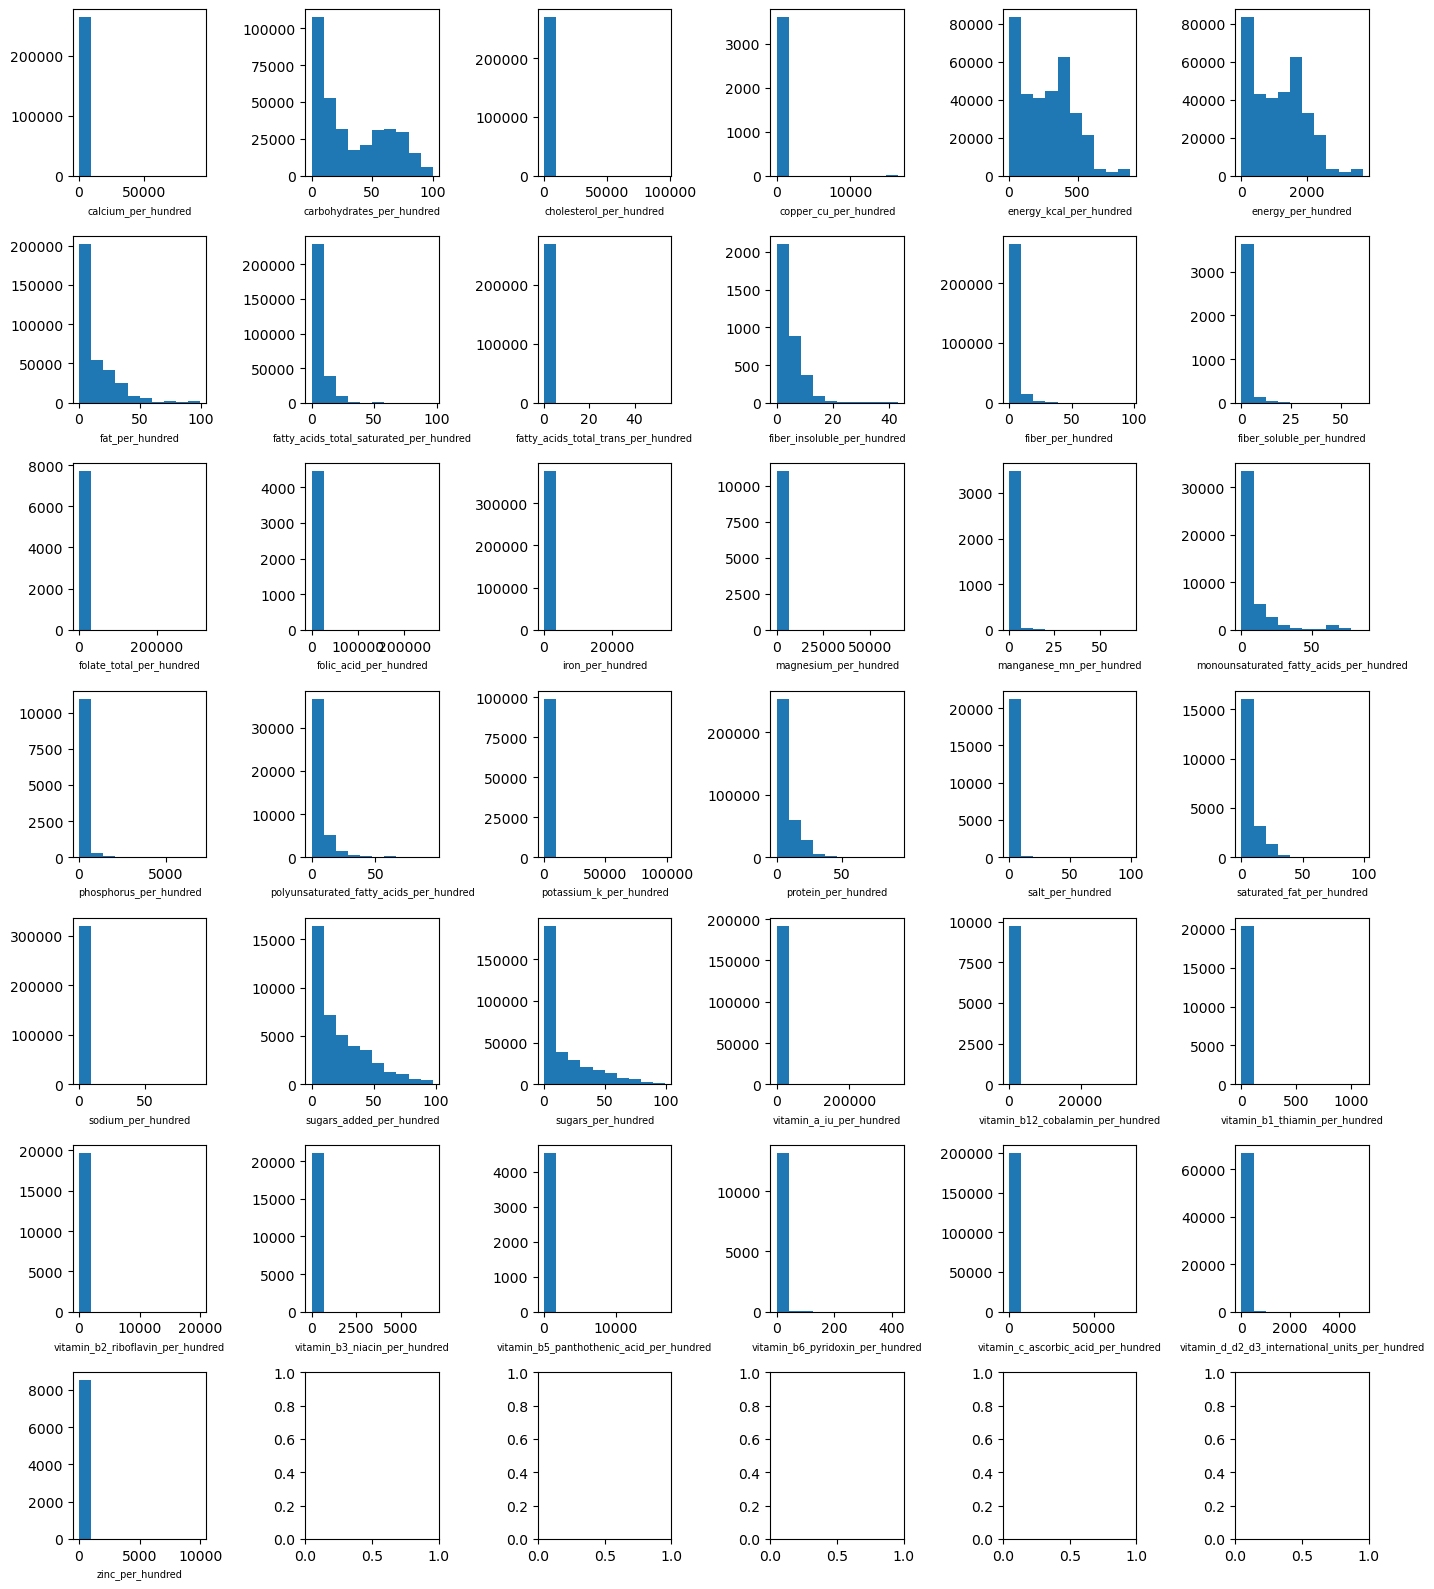

In [50]:
list_per_hundred_col = df_per_hundred

nb_cols = int(np.sqrt(len(list_per_hundred_col)))
nb_rows = int(np.sqrt(len(list_per_hundred_col))) + 1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (14,16)) 

x = 0
y = 0
for i in range(len(list_per_hundred_col)):
    values = df[list_per_hundred_col[i]] #df_copy[list_per_hundred_col[i]]
    axes[x,y].hist(values)
    axes[x,y].set_xlabel(list_per_hundred_col[i], fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

For the distribution we observed some changes for certains column not all. ***Describe changes*** No big visible changes execpt for the energ

4. Inconsistency between energy columns :
    * a. The column energy_per_hundred measures the energy content in kJ. Analyse its relationship with the column energy_kcal_per_hundred, for example using a scatterplot, identify potential problems and address them.
    * b. The column energy_per_hundred is also related to the macronutrient columns (protein, fat, carbohydrates, salt, and fiber), because these macronutrients have a specific energy content in kJ per hundred gram (e.g. fat 37 kJ/g, protein and carbohydrates 17 kJ/g). Check these columns for potential inconsistency.
    * c. The main macronutrients (protein, fat, carbohydrates, and fiber) make up the bulk of a product. However, the overall contribution per hundred gram is limited by the presence of other macronutrients. Check for inconsistency.



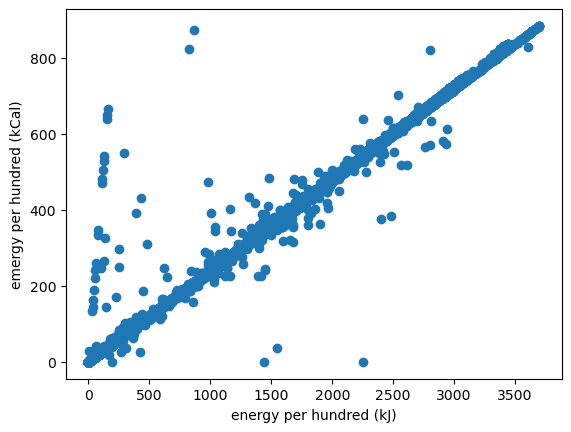

In [51]:
plt.plot(df['energy_per_hundred'],df['energy_kcal_per_hundred'], 'o')
plt.xlabel("energy per hundred (kJ)")
plt.ylabel("emergy per hundred (kCal)")

#a, b = np.polyfit(df['energy_per_hundred'],df['energy_kcal_per_hundred'], 1)
#plt.plot(df['energy_per_hundred'], a*df['energy_per_hundred']+b)

# Annotation
#plt.text(150, 2500, 'y='+ a + '*x + '+b, fontsize=20)

plt.show()

Between energy in kJ and energy in kCal the difference is linear : 1 KJ = 1/4.184 kCal. We expect that the comparison between this two columns show point distributed on a straight line. Some points aren't on the diagonal, which means they have either a wrong estimate of energy in kcal or a wrong estimate of energy in kJ or both. We have to re-estimate this points base on their content in fat carbohydrates, fiber and protein. 

We will re-estimate the enegertic values :

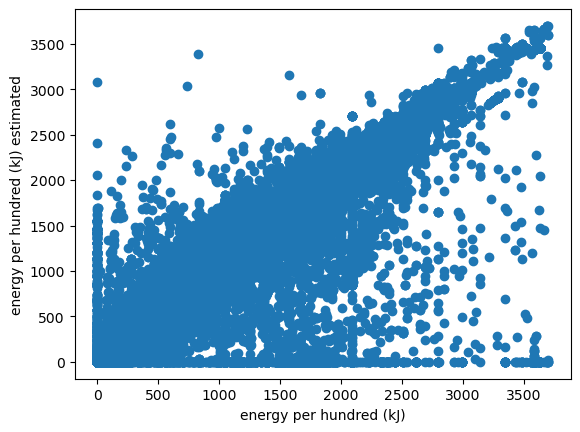

In [52]:
def energy_kJ(df_test):
    #print(df_test)
    df_test.fillna(0, inplace=True)
    #print(df_test)
    if(sum([df_test['carbohydrates_per_hundred'], df_test['fat_per_hundred'], df_test['fiber_per_hundred'], df_test['protein_per_hundred']]) <= 100):# if this is above 100 it's mean there is an error
        value = sum([df_test['carbohydrates_per_hundred'] * 17, df_test['fat_per_hundred'] * 37, df_test['fiber_per_hundred'] * 8, df_test['protein_per_hundred'] * 17])
        #print(value)
        return value

#df_copy = df[1:10]     
df['energy_per_hundred_estimated']= df[['energy_per_hundred','energy_kcal_per_hundred','carbohydrates_per_hundred','fat_per_hundred', 'fiber_per_hundred','protein_per_hundred' ]].apply(energy_kJ, axis=1)
#df['energy_kcal_per_hundred_estimated']=df['energy_per_hundred']/4.184

plt.plot(df['energy_per_hundred'],df['energy_per_hundred_estimated'], 'o')
plt.xlabel("energy per hundred (kJ)")
plt.ylabel("energy per hundred (kJ) estimated")

plt.show()

We find that the energy value is often underestimated, sometimes even reduced to 0. We don't want to introduce any new missing values. Futhermore, by taking only macronutrients into account, the energy value may be underestimated. 

In other cases, we find that we estimate a value for certain elements with energy values at 0 or lower than the energy value of macronutrients alone. 

Replacing only the energy values in kJ of those elements whose value is estimated to be higher than the present value enables us to complete and correct erroneous values based on other indicators. The kCal value is corrected to the kJ value.

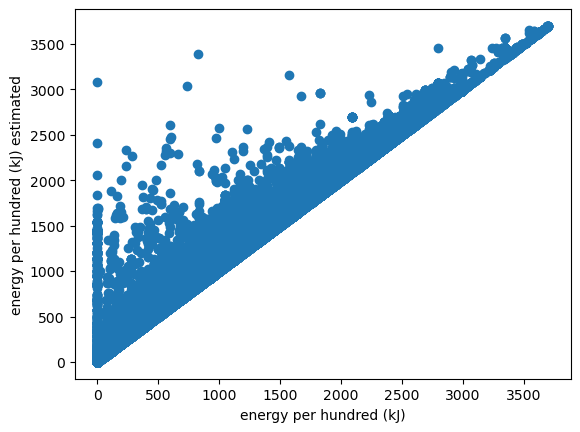

In [53]:
def energy_kJ(df_test):
    #print(df_test)
    df_test.fillna(0, inplace=True)
    #print(df_test)
    if(sum([df_test['carbohydrates_per_hundred'], df_test['fat_per_hundred'], df_test['fiber_per_hundred'], df_test['protein_per_hundred']]) <= 100):# if this is above 100 it's mean there is an error
        value = sum([df_test['carbohydrates_per_hundred'] * 17, df_test['fat_per_hundred'] * 37, df_test['fiber_per_hundred'] * 8, df_test['protein_per_hundred'] * 17])        
        if value < df_test['energy_per_hundred']: 
            value = df_test['energy_per_hundred']
        #print(value)
        return value

#df_copy = df[1:10]     
df['energy_per_hundred_estimated']= df[['energy_per_hundred','energy_kcal_per_hundred','carbohydrates_per_hundred','fat_per_hundred', 'fiber_per_hundred','protein_per_hundred' ]].apply(energy_kJ, axis=1)
#df['energy_kcal_per_hundred_estimated']=df['energy_per_hundred']/4.184

plt.plot(df['energy_per_hundred'],df['energy_per_hundred_estimated'], 'o')
plt.xlabel("energy per hundred (kJ)")
plt.ylabel("energy per hundred (kJ) estimated")

plt.show()

In [54]:
df['energy_per_hundred']= df['energy_per_hundred_estimated']
df['energy_kcal_per_hundred']=df['energy_per_hundred']/4.184

5. Despite removing recording errors from the per_hundred columns, some of them still contain “extreme” values, which are distinct from the rest of the data points. Your goal is to pick a few variables from the per_hundred list and address outliers. Be mindful that some outlier detection approaches are not reliable when the underlying variables are strongly skewed.

We will not come back on energy columns or on macronutriment column (with sugaer too, the distribution is mono-modal). 

We focus on this columns : 


In [55]:
col_outlier = ['calcium_per_hundred', 'cholesterol_per_hundred', 'copper_cu_per_hundred', 'fatty_acids_total_saturated_per_hundred', 
               'fatty_acids_total_trans_per_hundred', 'fiber_insoluble_per_hundred', 'fiber_soluble_per_hundred', 'folate_total_per_hundred', 
               'folic_acid_per_hundred', 'iron_per_hundred', 'magnesium_per_hundred', 'manganese_mn_per_hundred', 'monounsaturated_fatty_acids_per_hundred', 
               'phosphorus_per_hundred', 'polyunsaturated_fatty_acids_per_hundred', 'potassium_k_per_hundred', 'salt_per_hundred', 'sodium_per_hundred', 
               'vitamin_a_iu_per_hundred', 'vitamin_b12_cobalamin_per_hundred', 'vitamin_b1_thiamin_per_hundred', 'vitamin_b2_riboflavin_per_hundred', 'vitamin_b3_niacin_per_hundred', 
               'vitamin_b5_panthothenic_acid_per_hundred', 'vitamin_b6_pyridoxin_per_hundred', 'vitamin_c_ascorbic_acid_per_hundred', 'vitamin_d_d2_d3_international_units_per_hundred', 'zinc_per_hundred']

df[col_outlier].shape

(374884, 28)

All data are skewed (right-skewed) so in place of using a filter based on the standard deviation ((x-x.mean()) < 3 * x.std()) we will discard values > to the quantile(0.9) 10% of max value) :

In [56]:
# df_copy[col_outlier].apply(lambda x:  np.NaN if np.abs(x - x.mean()) > (3 * x.std()) else x, axis = 1  ) # NaN unsupported

for col in col_outlier:
    
    print(col)
    #zfilter_df = np.abs(df[col] - df[col].mean()) > (3 * df[col].std())
    #df[col][zfilter_df] = np.NaN
    threshold = df[col].quantile(0.90)
    df.loc[df[col] > threshold ,col] = np.NaN
    
    #plt.boxplot(df[col].dropna())
    #plt.hist(df[col])
    #plt.xlabel(col)
    #plt.show()



calcium_per_hundred
cholesterol_per_hundred
copper_cu_per_hundred
fatty_acids_total_saturated_per_hundred
fatty_acids_total_trans_per_hundred
fiber_insoluble_per_hundred
fiber_soluble_per_hundred
folate_total_per_hundred
folic_acid_per_hundred
iron_per_hundred
magnesium_per_hundred
manganese_mn_per_hundred
monounsaturated_fatty_acids_per_hundred
phosphorus_per_hundred
polyunsaturated_fatty_acids_per_hundred
potassium_k_per_hundred
salt_per_hundred
sodium_per_hundred
vitamin_a_iu_per_hundred
vitamin_b12_cobalamin_per_hundred
vitamin_b1_thiamin_per_hundred
vitamin_b2_riboflavin_per_hundred
vitamin_b3_niacin_per_hundred
vitamin_b5_panthothenic_acid_per_hundred
vitamin_b6_pyridoxin_per_hundred
vitamin_c_ascorbic_acid_per_hundred
vitamin_d_d2_d3_international_units_per_hundred
zinc_per_hundred


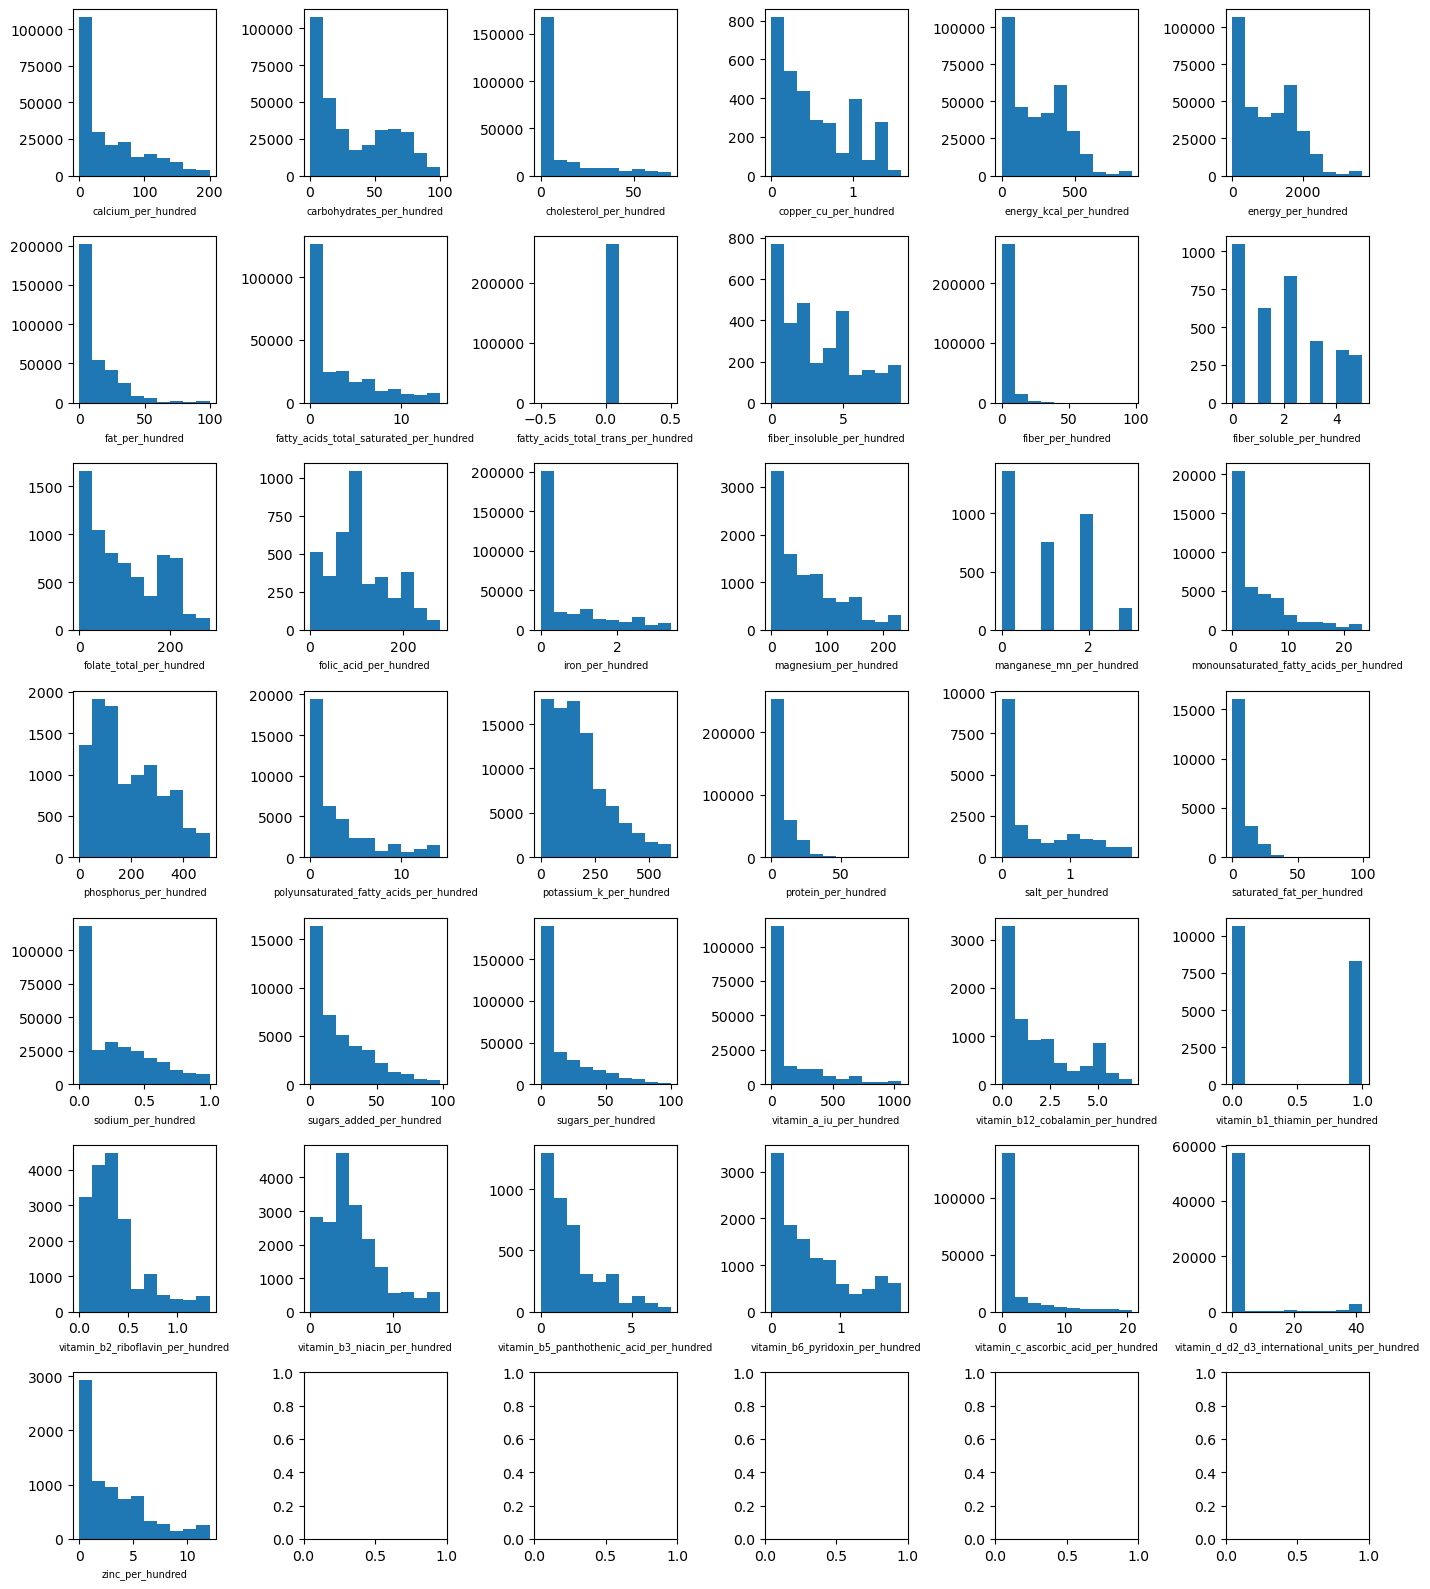

In [57]:
list_per_hundred_col = df_per_hundred

nb_cols = int(np.sqrt(len(list_per_hundred_col)))
nb_rows = int(np.sqrt(len(list_per_hundred_col))) + 1

fig, axes = plt.subplots(nrows = nb_rows, 
                         ncols = nb_cols, 
                         figsize = (14,16)) 

x = 0
y = 0
for i in range(len(list_per_hundred_col)):
    values = df[list_per_hundred_col[i]] #df_copy[list_per_hundred_col[i]]
    axes[x,y].hist(values)
    axes[x,y].set_xlabel(list_per_hundred_col[i], fontsize=7)
    
    if (y+1)/nb_cols == 1:
        y = -1
        x = x + 1
    y = y + 1
    
        
fig.tight_layout()

plt.show()

Everything isn't perfect but data are more contain. less outlier are visible. vitamin b1 b6 b12 d d2 d3 seems multi-modal. That could be outlier but that could indicate that some kind of product have typical vitamin content. 

The task C is long to execute: So we save the output and we will redownload it for the next task :

In [70]:
f = 'Ressources/df_taskC.csv'
df.to_csv(f, index=False) 

# compression_opts = dict(method='zip', archive_name= f)
# df.to_csv('Ressources/df_taskC.zip', index=False, compression=compression_opts) 

<a id="TaskD"></a>
## OpenFood database : Task D
[top](#top)

###  EDA : Text data 

In this task, you will work with the ingredients_en column; your goal is to preprocess the text data in this column and answer the following questions.

1. Find the product with the longest ingredients list, i.e. the largest number of ingredients. Print the product name and its ingredient list.
2. Find the products with the shortest ingredients list, i.e. the fewest ingredients. Display some examples and comment on your observation.
3. Which are the most frequent ingredients in products? You will also choose an appropriate method to visualize your findings.

Be careful with text normalization:

- punctuation, e.g., “water.” vs. “water”
- capitalization, e.g., “water” vs. “Water”
- white spaces removal, e.g., “ water” vs. “water”
- special characters, e.g. “raw beef [soja sauce (with ble), …]”


In [52]:
#Task D library : 
import matplotlib.pyplot as plt
import seaborn as sns
#import numpy as np
import pandas as pd
import re
import nltk

%matplotlib inline

In [6]:
filename = "Ressources/df_taskC.csv"
df = pd.read_csv(filename)

### Ingredient list format : preproccess  
- Firstly we need to see how ingredient is listed :  

In [9]:
print_full(df.loc[0:21,'ingredients_en'])

0             Superior quality durum wheat Pasta\r\n\r\nIngredients: Durum wheat, water\r\n\r\nAll agricultural ingredients are products of organic farming
1                                                                                                                      Bio Milk (Switzerland), kitchen salt
2                                                                                                                                      100%  coffee Arabica
3                                       Powdered chocolate 99% (sugar, cocoa), emulsifier (soy lecithin), flavour (vanillin), Cinnamon.  32% cocoa minimum.
4     cocoa paste * (Honduras), raw cane sugar * (Paraguay), cocoa butter * (Dominican Republic), vanilla beans *. Cocoa content of chocolate: 70% minim...
5                                                                                                                                              cocoa powder
6     Sugar, whole milk powder, cocoa butter, cocoa mass, honey 

In [10]:
#25 elements with the shortest list of ingredients
list_ingredients = df['ingredients_en']
type(list_ingredients)
list_ingredients = sorted(list_ingredients, key=len)
list_ingredients[0:25]  #what is COD ? a fish 

['é',
 'er',
 'wa',
 'Tea',
 'Rum',
 'Cod',
 'Cod',
 'Cod',
 'wat',
 '---',
 'wat',
 'COD',
 'COD',
 'COD',
 'COD',
 'COD',
 'COD',
 'COD',
 'COD',
 'rice',
 'eggs',
 'Peas',
 'BEER',
 'nuts',
 'rice']

In [11]:
#5 elements with the longest list of ingredients
list_ingredients = sorted(list_ingredients, key=len, reverse=True)
list_ingredients[0:5] 

['Arcoiris: Enriched Flour (Wheat Flour, Niacinamide, Ferrous Fumarate, Thiamin Mononitrate, Riboflavin, Folic Acid), Sugar, High Fructose Corn Syrup, Corn Syrup, Vegetable Oil Blend (Palm Oil, Sunflower Oil and/or Canola Oil and/or Soybean Oil, [Contains Ascorbyl Palmitate, Tocopherols and TBHQ as Preservatives]), Coconut (with Sodium Metabisulfite [Preservative]), Corn Starch, Contains 2% or Less of: Gelatin, Soy Flour, Salt, Leavening Agents (Sodium Bicarbonate, Ammonium Bicarbonate, Aluminum Sodium Sulfate), Artificial Flavor, Soy Lecithin, Propylene Glycol Monostearate, FD&C Red 3, FD&C Red 40, FD&C Yellow 5, FD&C Yellow 6, FD&C Blue 1, Glyceryl Monostearate, Hydrolyzed Soy Protein, Sodium Stearoyl Lactylate, Calcium Sulfate, Zinc Oxide, Sodium Hexametaphosphate, Caramel Color. CONTAINS WHEAT, COCONUT, AND SOY INGREDIENTS. MAY CONTAIN TRACES OF MILK, EGG, PEANUTS AND TREE NUTS. Emperador Chocolate: Enriched Flour (Wheat Flour, Niacinamide, Ferrous Fumarate, Thiamin Mononitrate, Ri

ingredients are often word composed. we should remove : 
- \r \n
- special caracters as : ()*\%[]" except : ***,***
- numbers
- stopword
- word "organic" and others not ingredient related word as contain, contains, preserve, freshness, following, ingredient, ingredients, traces ...

Then we group as token words between two comma ","

In [12]:
# Load English stopwords from nltk
#import nltk

nltk.download("stopwords", quiet=True)

from nltk.corpus import stopwords

stopwords_english = stopwords.words("english")
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [13]:
def transform(s): # remove - \r \n, - special caracters as : ()*\%[]" except : ***,***, - numbers
    s = s.str.replace("\n", " ", regex=True)
    s = s.str.replace("\r", " ", regex=True)
    s = s.str.replace(":", ",", regex=True)
    s = s.str.replace("^and", ",", regex=True)
    s = s.str.replace(".", ",", regex=True)
    s = s.str.replace(r'[^a-zA-Z, ]', " ", regex=True)
    s = s.str.replace(r'[0-9]', "", regex=True)
   
    return s

In [14]:
from collections import Counter

def flatten_extend(matrix): #code source : https://realpython.com/python-flatten-list/
    flat_list = []
    for row in matrix:
        flat_list.extend(row)
    return flat_list


list_ingredients = df['ingredients_en']
list_ingredients3 = transform(list_ingredients.str.lower())
list_ingredients3 = list_ingredients3.str.replace(',', ' ', regex=True)
list_ingredients3 = list_ingredients3.str.replace(' +', ' ', regex=True)
list_ingredients4 = [tok for tok in flatten_extend(list_ingredients3.str.split()) if tok not in stopwords_english]

len(list_ingredients4)

11394576

In [15]:
#print_full(list_ingredients3[0:5])
Counter(list_ingredients4).most_common(100)#200

[('salt', 364017),
 ('sugar', 265715),
 ('oil', 259336),
 ('acid', 252874),
 ('water', 216594),
 ('flour', 203613),
 ('milk', 189783),
 ('corn', 186193),
 ('natural', 181108),
 ('organic', 169625),
 ('sodium', 161655),
 ('wheat', 151327),
 ('flavor', 136276),
 ('powder', 118910),
 ('syrup', 114702),
 ('starch', 110446),
 ('gum', 110373),
 ('soy', 109213),
 ('citric', 97466),
 ('vitamin', 96275),
 ('color', 94417),
 ('cheese', 89011),
 ('lecithin', 80283),
 ('garlic', 78781),
 ('juice', 78591),
 ('less', 77825),
 ('contains', 77407),
 ('artificial', 75399),
 ('soybean', 73356),
 ('extract', 70229),
 ('palm', 69790),
 ('red', 69303),
 ('flavors', 66188),
 ('calcium', 65737),
 ('modified', 63879),
 ('cocoa', 63346),
 ('vinegar', 60418),
 ('phosphate', 60226),
 ('concentrate', 59864),
 ('riboflavin', 58946),
 ('butter', 58909),
 ('yellow', 58869),
 ('folic', 58603),
 ('vegetable', 56073),
 ('mononitrate', 56013),
 ('potassium', 55644),
 ('enzymes', 54866),
 ('onion', 54709),
 ('iron', 5451

list of word  to add to the words to remove :'organic', 'less','contain', 'contains','ingredient', 'ingredients', 'freshness','following', 'culture', 'cultures', 'cultured','missing', 'preservative'.

In [16]:
#List upadated by word seeing
stopwords_english.extend(('organic', 'less','contain', 'contains','ingredient', 'ingredients', 'freshness','following', 'culture', 'cultures', 'cultured','missing', 
                          'preservative','trace','traces', 'agricultural', 'products','farming', 'minimum','accordance','st', 'ards', 'total', 'weight', 'mass', 'balance',
                          'come', 'farms', 'é', 'er', '---', 'content', 'fairtrade', 'standards','converted'))
print(stopwords_english)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now we compile our preprcocessing work into one function :

In [17]:
def process_text_to_token(text):
    
    '''
    This function :
    - Removes stop words
    - Splits text on comma
    
    INPUT: 
    - text: "raw" text (string)
    
    OUTPUT:
    - processed_sample_tokens: list of tokens (list of strings)
    '''
    #text = text.replace(",", " ,")
   # text = re.sub(' +', ' ',text)
    

    #s = re.sub('\b|^'.join(stopwords_english),'',s) #ne fonctionne pas
    wordsToRemove = (r'\b%s\b' % r'\b|\b'.join(map(re.escape,stopwords_english)))
    text =re.sub(wordsToRemove, "", str(text))
    text = re.sub(' +', ' ',text)
   
    # Remove stop words and split on whitespace
    processed_sample_tokens = [tok.strip() for tok in text.split(',')]# if tok not in stopwords_english]
    
    #processed_sample_tokens = re.sub(' +', ' ',str(processed_sample_tokens))
    
    while("" in processed_sample_tokens):
        processed_sample_tokens.remove('')
    
    # remove duplicate ingredients
    processed_sample_tokens = list(dict.fromkeys(processed_sample_tokens))
    
    return processed_sample_tokens

In [18]:
list_ingredients = df['ingredients_en']

# remove sepcial characters and more
list_ingredients = transform(list_ingredients.str.lower())

# To identify a list of word used not in relation with ingredient :
list_ingredients = [process_text_to_token(ingredients) for ingredients  in  list_ingredients]

#Remove duplicate ingredient in lists 
df['ingredients_en'] = list_ingredients
print(df['ingredients_en'][0])


['superior quality durum wheat pasta', 'durum wheat', 'water']


In [19]:
print_full(df['ingredients_en'][0:5])

0                                                                               [superior quality durum wheat pasta, durum wheat, water]
1                                                                                                   [bio milk switzerland, kitchen salt]
2                                                                                                                       [coffee arabica]
3                                                 [powdered chocolate sugar, cocoa, emulsifier soy lecithin, flavour vanillin, cinnamon]
4    [cocoa paste honduras, raw cane sugar paraguay, cocoa butter dominican republic, vanilla beans, cocoa chocolate, cocoa base sugars]
Name: ingredients_en, dtype: object

### 1. Product with the longest ingredients list : 
- We can looking for the product with the longest list of ingredients: 

In [20]:
s = df.ingredients_en.str.len().sort_values(ascending=False).index
print_full(df.loc[s[0:1],['product_name_en','ingredients_en']].head())
print(df.loc[s[0:1],['product_name_en','ingredients_en']].values) #To show the entierety of the ingredients_en cell


,product_name_en,ingredients_en
46512,BANQUET Ham and Cheese Breadstick,"[ham cheese sticks, bleached enriched wheat flour bleached wheat flour, malted barley flour, niacin, reduced iron, thiamine mononitrate, riboflavi..."


[['BANQUET Ham and Cheese Breadstick'
  list(['ham cheese sticks', 'bleached enriched wheat flour bleached wheat flour', 'malted barley flour', 'niacin', 'reduced iron', 'thiamine mononitrate', 'riboflavin', 'folic acid', 'water', 'cooked ham ham', 'sodium lactate', 'salt', 'dextrose', 'corn syrup solids', 'sodium phosphates', 'smoke flavoring', 'sodium diacetate', 'sodium erythorbate', 'sodium nitrite', 'soybean oil blend soybean oil', 'partially hydrogenated soybean oil', 'citric acid', 'casein', 'cheddar flavored bread crumbs bleached wheat flour', 'cheddar cheese milk', 'cheese', 'enzymes', 'whey', 'sugar', 'buttermilk solids', 'yellow corn flour', 'yeast', 'soybean oil', 'lactic acid', 'yellow', 'extractives paprika', 'milk protein concentrate', 'cheddar cheese blend whey', 'maltodextrin', 'buttermilk', 'canola oil', 'sodium phosphate', 'modified food starch', 'coconut oil', 'phosphate calcium', 'sodium', 'potassium', 'natural flavor', 'color annatto', 'turmeric', 'sodium caseinat

Even after removing duplicate ingredient (token) we saw some repetition in this list as with : 
- 'cheddar flavored bread crumbs bleached wheat flour', 
- 'cheddar cheese milk', 
- 'cheese'
- 'cheddar cheese flavor cheddar'
- 'blue semi soft cheese pasteurized milk'
- 'cheddar club cheese pasteurized milk'
or with :
- 'enzymes'
- 'enzyme'
or :
- 'yeast'
- 'yeast yeast'
or : 
- 'wheat'
- 'wheat flour'
- 'bleached enriched wheat flour bleached wheat flour'

The transformation introduce some error as : 'di', 'triglycerides' and this could refer to 'di and triglycerides'

Somes element refer to nothing understandable as : 'x', 'l'

### 2. Products with the shortest ingredients list : 
- We can looking for the products (10) with the shortest list of ingredients: 

In [21]:
ingredients_en_len = df.ingredients_en.str.len()
#print_full(df.loc[s[0:100],['product_name_en','ingredients_en']].head())
#print(df.loc[s[0:100],['product_name_en','ingredients_en']].values) #To show the entierety of the ingredients_en cell

In [22]:
ingredients_en_len = df[df.ingredients_en.str.len()>=1].ingredients_en.str.len()
df[['product_name_en','ingredients_en']][df.ingredients_en.str.len()>=1].head() 

,product_name_en,ingredients_en
0,Bio Spaghetti,"[superior quality durum wheat pasta, durum whe..."
1,Naturaplan Mozzarella,"[bio milk switzerland, kitchen salt]"
2,Caffè Mauro - Roasted organic coffee blend,[coffee arabica]
3,Le chocolat Cailler - chocolate powder,"[powdered chocolate sugar, cocoa, emulsifier s..."
4,Naturaplan Extra Dark Chocolate 70%,"[cocoa paste honduras, raw cane sugar paraguay..."


In [23]:
df2 = df[['product_name_en','ingredients_en']].assign(ingredient_length=df['ingredients_en'].str.len()).sort_values('ingredient_length')
df2[df2['ingredient_length'] > 0].head(20)

,product_name_en,ingredients_en,ingredient_length
246179,100% CANOLA OIL,[canola oil],1
224592,GRANULATED SUGAR,[sugar],1
129569,"16 JEJU, NATURAL SPRING WATER",[volcanic bedrock water],1
243348,BASMATI RICE,[milled basmati rice],1
63121,CHAMOMILE HERBAL TEA,[chamomile],1
243279,EXTRA VIRGIN OLIVE OIL,[extra virgin olive oil],1
224574,VERMONT MAPLE SYRUP,[pure maple syrup],1
246176,"LOS VILLARES, SWEET MOSCATEL VINEGAR",[moscatel wine vinegar],1
242814,WHOLE FLAX SEED,[flax seed],1
246180,"BOB'S RED MILL, RED KIDNEY BEANS",[red kidney beans],1


The element with the fewest ingredient have 1 ingredient. 
I saw one error : MILK CANDY BARS ->[milk sugar], this element should have two ingredients listed : 'milk', 'sugar'. In this case it's highly probable that the ingredient have not been separete by a comma.

### 3. Most frequent ingredients in products :

We will display the 50 most frequent ingredients with a bar chart :

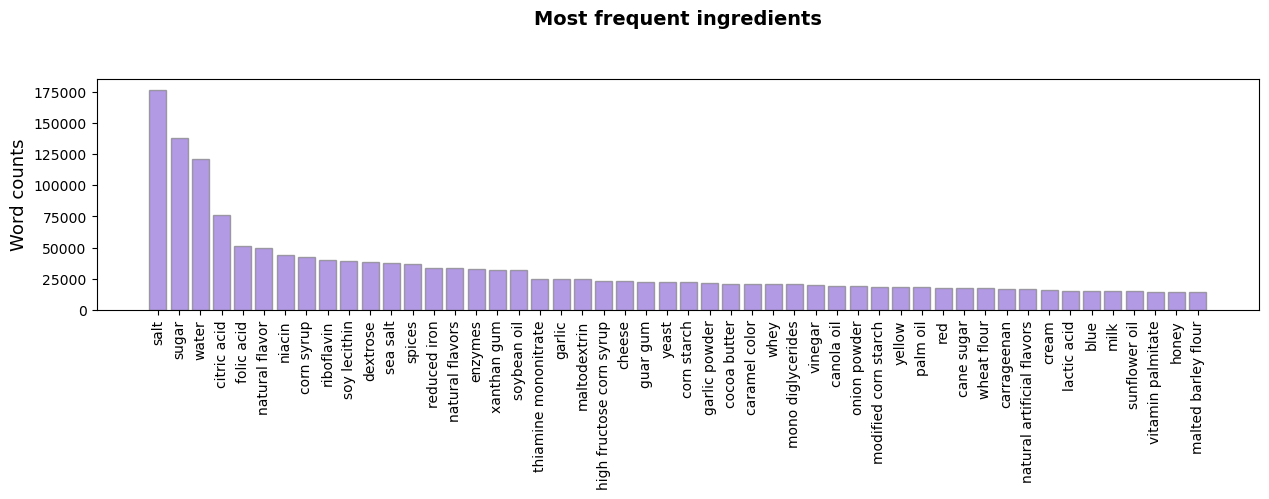

In [24]:
list_ingredients = flatten_extend(df['ingredients_en'])
ingredient = Counter(list_ingredients).most_common(50)#200

# Barplot and font specifications
barplot_specs   = {"color": "mediumpurple", "alpha": 0.7, "edgecolor": "grey"}
title_specs     = {"fontsize": 14, "fontweight": "bold", "y": 1.2}
label_specs     = {"fontsize": 13}

plt.figure(figsize=(15,3))
plt.bar(*zip(*ingredient), **barplot_specs)
plt.title('Most frequent ingredients', **title_specs)
plt.ylabel('Word counts', **label_specs)
plt.xticks(rotation=90)
plt.show()

<a id="TaskE"></a>
## OpenFood database : Task E
[top](#top)

### EDA times-series data

In this task, you will work with the created_at column that stores the date and time at which products were added to the Open Food database. You will analyze the total number of products added to the database.
- 1. Draw heatmap with the hours on x axis qnd month on y axis the color should show the number of items created at each month_hour pair. 
- 2. Draw a bar plot  of the total number of items over time. Each bar in the plot should stack the number of items created by each country each month.

### 1. Draw heatmap 

Firstly we will check in which form information is save into created_at column. we need to check the type and if it'snot the case to attributed the date type to this column

In [31]:
df["created_at"].head()

0    2016-06-01T11:42:22.908Z
1    2016-06-01T11:42:25.111Z
2    2016-06-01T11:42:25.900Z
3    2016-06-01T11:42:26.184Z
4    2016-06-01T11:42:26.350Z
Name: created_at, dtype: object

We convert the created_at column in a datetime format :

In [42]:
dates = pd.to_datetime(df["created_at"])
df["created_at"] = dates
df["created_at"].head()

We will create our own dataframe to generate  an heatmap plot :

In [59]:
df_dates = pd.DataFrame(
    {
        "dates": pd.to_datetime(df["created_at"]),
        "year": pd.DatetimeIndex(pd.to_datetime(df["created_at"])).year,
        "month": pd.DatetimeIndex(pd.to_datetime(df["created_at"])).month,
        "hour": pd.DatetimeIndex(pd.to_datetime(df["created_at"])).hour,
        "country": df["country"] #this column will serve for the second task
    }
)
df_dates.head()

,dates,year,month,hour,country
0,2016-06-01 11:42:22.908000+00:00,2016,6,11,CH
1,2016-06-01 11:42:25.111000+00:00,2016,6,11,CH
2,2016-06-01 11:42:25.900000+00:00,2016,6,11,CH
3,2016-06-01 11:42:26.184000+00:00,2016,6,11,CH
4,2016-06-01 11:42:26.350000+00:00,2016,6,11,CH


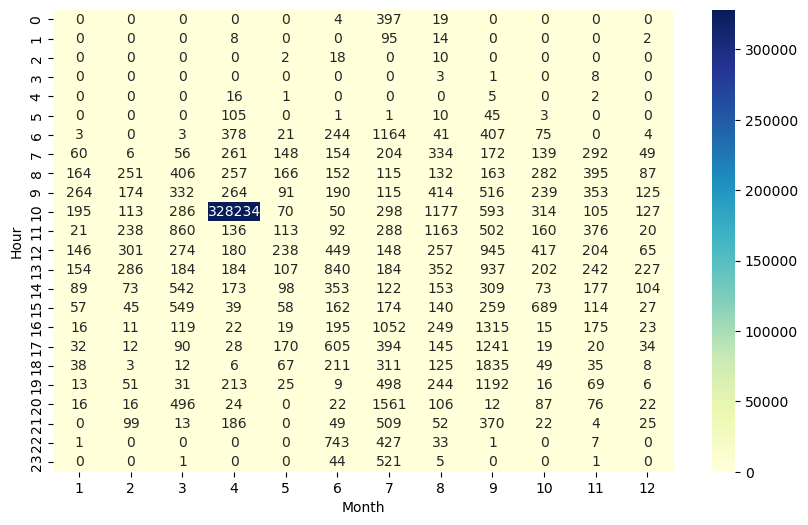

In [53]:
# We create a pivot_table to get the count per month per hour
pivot_table = df_dates.pivot_table(index='hour', columns='month', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Month')
plt.ylabel('Hour')

plt.show()

We saw that most of the entry have been made at a specific combinaison of month-hour around 10 AM in April.Except this we saw that in generall the input are done between 7 Am and 8 PM Some have been made later in june and july, until midnight.  It's difficult to detailled more or identify some others information du to big difference of values between the importqnt number of entry done around 10 AM in April in comparaison to the rest.

### 2. Draw barplot

In [77]:
count_per_month = df_dates.groupby(['year','month','country'])['dates'].count().reset_index(name='counts')
count_per_month.head()

,year,month,country,counts
0,2016,5,CH,20
1,2016,6,CH,1082
2,2016,7,CH,7395
3,2016,8,CH,291
4,2016,9,CH,5382


In [122]:
df_count_per_month = pd.pivot_table(count_per_month, values='counts',  index=['year', 'month'], columns=['country'], aggfunc="sum").reset_index()
df_count_per_month

country,year,month,AT,CH,DE,FR,IT,UK,US
0,2016,5,NaN,20.0,NaN,NaN,NaN,NaN,NaN
1,2016,6,NaN,1082.0,NaN,NaN,NaN,NaN,NaN
2,2016,7,NaN,7395.0,NaN,NaN,NaN,NaN,NaN
3,2016,8,NaN,291.0,NaN,NaN,NaN,NaN,NaN
4,2016,9,NaN,5382.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
57,2021,6,NaN,247.0,NaN,2.0,NaN,NaN,25.0
58,2021,7,NaN,262.0,NaN,NaN,NaN,NaN,NaN
59,2021,8,NaN,217.0,NaN,NaN,NaN,NaN,3.0
60,2021,9,NaN,365.0,NaN,8.0,NaN,NaN,NaN


In [123]:
#df_count_per_month.index = pd.to_datetime(df_count_per_month.month.astype(str) + "-" + df_count_per_month.year.astype(str))
df_count_per_month.index =df_count_per_month.year.astype(str)+"-"+df_count_per_month.month.astype(str).str.zfill(2)
df_count_per_month.head()

country,year,month,AT,CH,DE,FR,IT,UK,US
2016-05,2016,5,NaN,20.0,NaN,NaN,NaN,NaN,NaN
2016-06,2016,6,NaN,1082.0,NaN,NaN,NaN,NaN,NaN
2016-07,2016,7,NaN,7395.0,NaN,NaN,NaN,NaN,NaN
2016-08,2016,8,NaN,291.0,NaN,NaN,NaN,NaN,NaN
2016-09,2016,9,NaN,5382.0,NaN,NaN,NaN,NaN,NaN


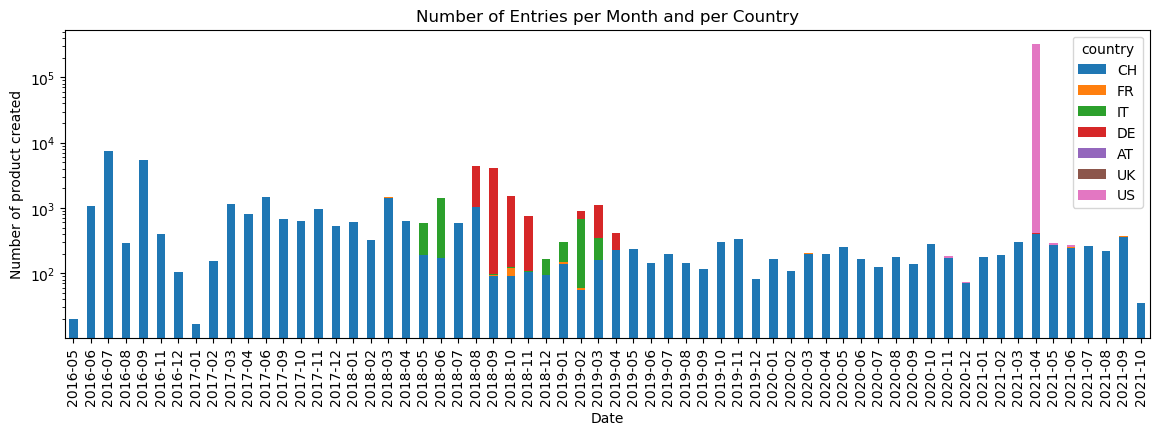

In [130]:
# plot data in stack manner of bar type
df_count_per_month[df.country.unique()].plot( kind='bar', stacked=True,figsize=(14, 4))
plt.yscale("log")

plt.xlabel('Date')
plt.ylabel('Number of product created')
plt.title('Number of Entries per Month and per Country')

plt.show()

We saw That they are a high pick of entries in april 2024. We can do an heatmap without the US data

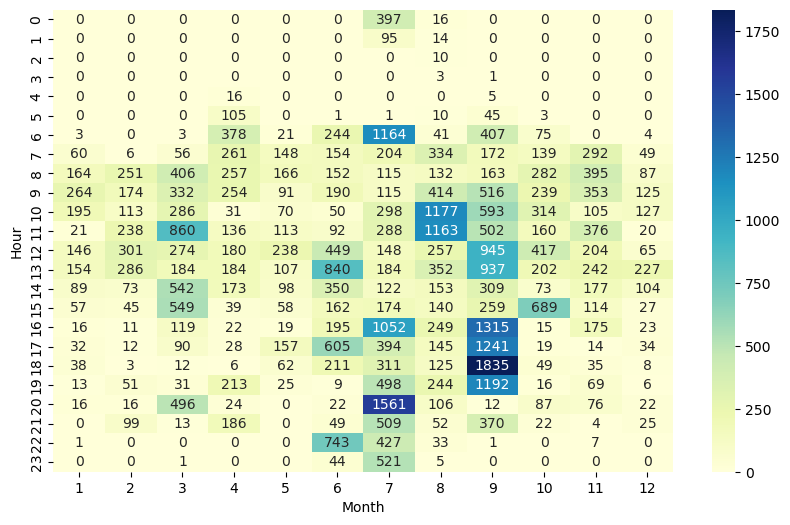

In [128]:
df_dates = df_dates[df_dates.country != "US"]

# We create a pivot_table to get the count per month per hour
pivot_table = df_dates.pivot_table(index='hour', columns='month', aggfunc='size', fill_value=0)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt='d', cbar=True)
plt.xlabel('Month')
plt.ylabel('Hour')

plt.show()

<a id="TaskF"></a>
## OpenFood database : Task F
[top](#top)

### EDA Correlation analysis


<a id="TaskG"></a>
## Advanced EDA
[top](#top)
